In [33]:
!pip install onnxruntime --quiet
!pip install onnx

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from PIL import Image
import os as os
import onnxruntime

In [ ]:
def capture_image():
    # Open the camera
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Unable to open camera.")
        return

    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        print("Error: Unable to capture frame.")
        return

    # Create the directory if it doesn't exist
    directory = "images"
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Save the captured image in the directory
    filename = os.path.join(directory, "captured_image.jpg")
    cv2.imwrite(filename, frame)

    # Release the camera
    cap.release()

    print("Image captured successfully.")

def display_image():
    # Read the captured image
    img = cv2.imread("images/captured_image.jpg")

    if img is None:
        print("Error: Unable to read the image.")
        return

    # Display the image in a new window
    cv2.imshow("Captured Image", img)
    cv2.waitKey(5000)  # Display the image for 5 seconds
    cv2.destroyAllWindows()

if __name__ == "__main__":
    while True:
        capture_image()
        display_image()
        time.sleep(5)

In [34]:
live_img = cv2.imread('/content/test1.jpg')

gray_live_img= cv2.cvtColor(live_img, cv2.COLOR_RGB2GRAY)
contours, _ = cv2.findContours(gray_live_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the contour with the largest area
largest_contour = max(contours, key=cv2.contourArea)

    # Create an image variable containing only the largest contour
contour_img = cv2.drawContours(gray_live_img.copy(), [largest_contour], -1, (255, 255, 255))



In [27]:
# Example coordinates (replace these with your actual coordinates)
frame= cv2.resize(contour_img,(640,640))
tl= (100,45)
bl= (50,570)
tr= (485,48)
br= (575,562)
cv2.circle(frame,tl,5,(0,0,255),-1)
cv2.circle(frame,bl,5,(0,0,255),-1)
cv2.circle(frame,tr,5,(0,0,255),-1)
cv2.circle(frame,br,5,(0,0,255),-1)
# points to be transformed
pts1= np.float32([tl,bl,tr,br])
pts2= np.float32([[0,0],[0,640],[640,0],[640,640]])
matrix = cv2.getPerspectiveTransform(pts1,pts2)
warped_img=cv2.warpPerspective(frame, matrix,(640,640))



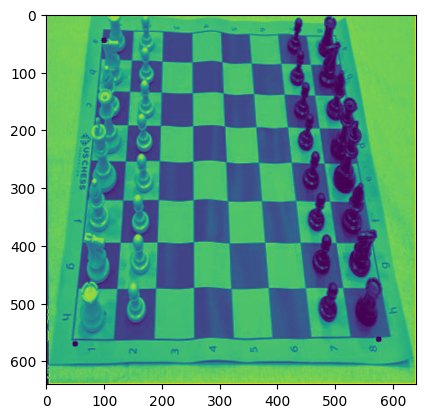

In [28]:
plt.imshow(frame)

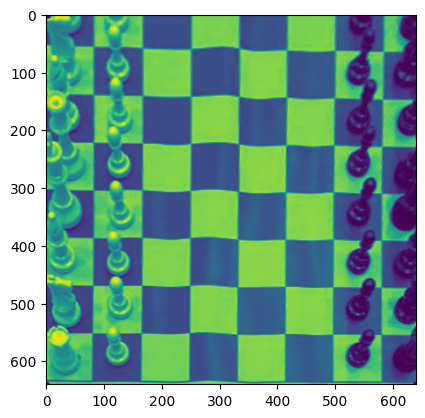

In [29]:
plt.imshow(warped_img)

In [ ]:

# Load the chessboard image


# Define the 4 corners of the chessboard in the original image
original_corners = np.array([[0, 0], [warped_img.shape[1] - 1, 0], [warped_img.shape[1] - 1, warped_img.shape[0] - 1], [0, warped_img.shape[0] - 1]], dtype=np.float32)

# Define the dimensions of each square
square_size = warped_img.shape[0] // 8

# Define the dimensions of the transformed chessboard (we'll make it square)
transformed_size = (square_size * 8, square_size * 8)

# Define the 4 corners of the transformed chessboard
transformed_corners = np.array([[0, 0], [transformed_size[0] - 1, 0], [transformed_size[0] - 1, transformed_size[1] - 1], [0, transformed_size[1] - 1]], dtype=np.float32)

# Compute the perspective transform matrix
perspective_matrix = cv2.getPerspectiveTransform(original_corners, transformed_corners)

# Apply the perspective transform to the original image
warped_image = cv2.warpPerspective(warped_img, perspective_matrix, transformed_size)
# Create the directory to store the images if it doesn't exist
directory = 'images'
if not os.path.exists(directory):
    os.makedirs(directory)

# Iterate through each row and column to extract each square
for i in range(8):
    for j in range(8):
        # Calculate the coordinates of the current square
        x1, y1 = j * square_size, i * square_size
        x2, y2 = x1 + square_size, y1 + square_size
        # Extract the current square from the warped image
        square = warped_image[y1:y2, x1:x2]

        # Save the square image to the 'images' folder
        cv2.imwrite(f'{directory}/square_{i}_{j}.jpg', square)

        # Load the image
        image = cv2.imread(f'{directory}/square_{i}_{j}.jpg')  # Replace 'input_image.jpg' with the path to your image

        # Resize the image to match the input size expected by the model
        resized_image = cv2.resize(image, (640,640))

        # Convert the image to RGB (if it's in BGR format)
        rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

        # Normalize the pixel values (assuming pixel values are in the range 0-255)
        normalized_image = rgb_image.astype(np.float32) / 255.0

        # Add batch dimension
        input_data = normalized_image[np.newaxis, ...]
        input_data = np.transpose(normalized_image, (2, 0, 1))
        print(input_data)  # Add a new axis at the beginning

        # Now 'input_data' is ready to be used as input for the model

print("Images saved successfully.")

In [31]:
import onnx

# Load the ONNX model
onnx_model_path = '/content/yolov5s.onnx'
model = onnx.load(onnx_model_path)

# Print input shapes
print("Input shapes:")
for input in model.graph.input:
    print(input.name, input.type.tensor_type.shape.dim)


Input shapes:
images [dim_value: 1
, dim_value: 3
, dim_value: 640
, dim_value: 640
]


In [22]:


# Load ONNX model
onnx_model_path = '/content/yolov5s.onnx'
ort_session = onnxruntime.InferenceSession(onnx_model_path)
 # Example input shape (batch_size, channels, height, width)

# Perform inference
ort_inputs = {ort_session.get_inputs()[0].name: input_data}
ort_outs = ort_session.run(None, ort_inputs)

# Process output (if needed)
# For example, extract bounding boxes, class labels, and confidence scores for object detection

# Print output
print(ort_outs)


InvalidArgument: [ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Got invalid dimensions for input: images for the following indices
 index: 1 Got: 640 Expected: 3
 index: 3 Got: 3 Expected: 640
 Please fix either the inputs/outputs or the model.

In [35]:
username = "02ankit482"

In [36]:
!git config --global user.email "482ankityadav@gmail.com"

In [37]:
!git config --global user.name "02ankit482"

In [38]:
from getpass import getpass
password = getpass('ankitpassword')

ankitpassword··········


In [39]:
!git clone https://github.com/Anshumaniacc/copper-knickers2.0.git

Cloning into 'copper-knickers2.0'...
remote: Enumerating objects: 452, done.
remote: Counting objects: 100% (452/452), done.
remote: Compressing objects: 100% (257/257), done.
remote: Total 452 (delta 181), reused 407 (delta 138), pack-reused 0
Receiving objects: 100% (452/452), 591.79 KiB | 9.54 MiB/s, done.
Resolving deltas: 100% (181/181), done.


In [42]:
%cd /content

/content


In [43]:
!git add .


fatal: not a git repository (or any of the parent directories): .git


In [44]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [45]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	copper-knickers2.0/
	images/
	sample_data/
	test1.jpg
	yolov5s.onnx

nothing added to commit but untracked files present (use "git add" to track)


In [47]:
!mkdir modal

In [48]:
%cd myrepo

[Errno 2] No such file or directory: 'myrepo'
/content


In [49]:
%cd /content?

Object `content` not found.


In [50]:
%cd /content

/content


In [51]:
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   .config/.last_opt_in_prompt.yaml
	new file:   .config/.last_survey_prompt.yaml
	new file:   .config/.last_update_check.json
	new file:   .config/active_config
	new file:   .config/config_sentinel
	new file:   .config/configurations/config_default
	new file:   .config/default_configs.db
	new file:   .config/gce
	new file:   .config/logs/2024.03.07/14.31.06.507923.log
	new file:   .config/logs/2024.03.07/14.31.32.270753.log
	new file:   .config/logs/2024.03.07/14.31.42.911124.log
	new file:   .config/logs/2024.03.07/14.31.51.601291.log
	new file:   .config/logs/2024.03.07/14.32.02.191519.log
	new file:   .config/logs/2024.03.07/14.32.02.895480.log
	new file:   copper-knickers2.0
	new file:   images/square_0_0.jpg
	new file:   images/square_0_1.jpg
	new file:   images/square_0_2.jpg
	new file:   images/square_0_3.jpg
	new file:   images/square_0_4.jpg
	new file:   images/

In [52]:
!git add .


In [53]:
!git commit -m "added modal"

[master (root-commit) bab052e] added modal
 87 files changed, 50873 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/logs/2024.03.07/14.31.06.507923.log
 create mode 100644 .config/logs/2024.03.07/14.31.32.270753.log
 create mode 100644 .config/logs/2024.03.07/14.31.42.911124.log
 create mode 100644 .config/logs/2024.03.07/14.31.51.601291.log
 create mode 100644 .config/logs/2024.03.07/14.32.02.191519.log
 create mode 100644 .config/logs/2024.03.07/14.32.02.895480.log
 create mode 160000 copper-knickers2.0
 create mode 100644 images/square_0_0.jpg
 create mode 100644 images/square_0_1.jpg
 create mode 100644 images/squ

In [60]:
!git remote add origin

usage: git remote add [<options>] <name> <url>

    -f, --fetch           fetch the remote branches
    --tags                import all tags and associated objects when fetching
                          or do not fetch any tag at all (--no-tags)
    -t, --track <branch>  branch(es) to track
    -m, --master <branch>
                          master branch
    --mirror[=(push|fetch)]
                          set up remote as a mirror to push to or fetch from



In [61]:
!git remote add origin https://github.com/Anshumaniacc/copper-knickers2.0.git

In [62]:
!git status

On branch master
nothing to commit, working tree clean


In [63]:
!git add .

In [64]:
!git commit -m "added modal"

On branch master
nothing to commit, working tree clean


In [65]:
!git push origin master

fatal: could not read Username for 'https://github.com': No such device or address


In [68]:
!git config --global user.name

02ankit482


In [72]:
!git push -u origin myrepo

error: src refspec myrepo does not match any
error: failed to push some refs to 'https://github.com/Anshumaniacc/copper-knickers2.0.git'
